<a href="https://colab.research.google.com/github/vatsaaa/mtech/blob/main/semester_1/03_assignments/ml/Group21_Financial_Transactions_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group members
<table width="100%">
  <tr>
    <th>Name</th>
    <th>Email</th>
    <th>Student ID</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>G. Ankur Vatsa</td>
    <td>2023aa05727@wilp.bits-pilani.ac.in</td>
    <td>2023aa05727</td>
    <td></td>
  </tr>
  <tr>
    <td>Radhika Joshi</td>
    <td>2023aa05976@wilp.bits-pilani.ac.in</td>
    <td>2023aa05976</td>
    <td></td>
  </tr>
  <tr>
    <td>Rajesh Tiwary</td>
    <td>2023aa05036@wilp.bits-pilani.ac.in</td>
    <td>2023aa05036</td>
    <td></td>
  </tr>
  <tr>
    <td>Randhawane Santosh Baban</td>
    <td>2023aa05828@wilp.bits-pilani.ac.in</td>
    <td>2023aa05828</td>
    <td></td>
  </tr>
</table>

# Assignment Part 1

## Problem Statement
Financial institutions face the constant challenge of detecting fraudulent transactions amidst legitimate ones. Early identification and prevention of such fraudulent activities are crucial for minimizing financial losses and protecting customer trust. The objective is to develop a mathematical model to identify risky transactions using the available features of the **Financial
Transactions** dataset.

## Dataset
**[Financial Transactions Dataset](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1-Rtizhn5EaLei3N3TOvqg4F74PTxtrjc%2Fview%3Fusp%3Dsharing)**

## Solution

## Import Libraries/Dataset
<ol>
<li>Download the dataset</li>
<li>Import the required libraries</li>
</ol>

In [220]:
import os, pprint
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.exceptions import UndefinedMetricWarning
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UndefinedMetricWarning)

In [221]:
from google.colab import drive
%load_ext google.colab.data_table

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [222]:
# index_col = 0 avoids creation of Unnamed column
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/ML/data/Group21_Financial_Transactions_Dataset.csv', index_col = 0)
df.sort_values(by=["Date", "Time of Day"], ascending = True, inplace = True)

## Visualization Exploration
<ol>
<li>Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them</li>
<li>Comment on class imbalance with appropriate visualization method</li>
<li>Provide appropriate data visualizations to get an insight about the dataset</li>
<li>Do the correlational analysis on the dataset. Provide a visualization for the same.</li>
<li>Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer.</li>
</ol>

### 1. Sanity check

In [186]:
"""
1. Print 2 rows for sanity check to identify all the features
present in the dataset and if the target matches with them
"""
df.head(2)

,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
49,656.929123,2023-01-01,Debit,Clothing,US,Mobile,3,8094.368818,1,0.057282,36,109498.302452,13126.098711,300,Bad,17,1176.854858,Low,0
237,631.750422,2023-01-01,Debit,Groceries,UK,Desktop,9,4115.014624,2,0.026540,55,34253.596520,5747.184223,764,Average,11,2237.074253,Medium,0


### 2. Class imbalance and imbalance visualization

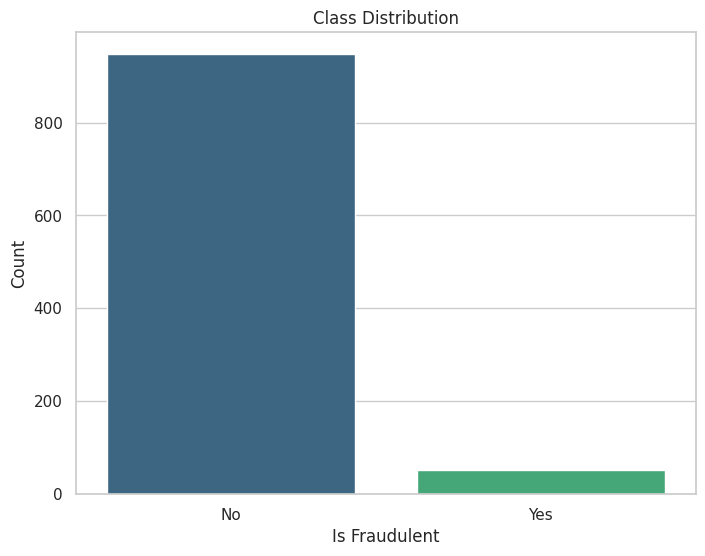

Class Distribution:
No     947
Yes     53
Name: Is Fraudulent, dtype: int64

Class Distribution Percentages:
No     0.947
Yes    0.053
Name: Is Fraudulent, dtype: float64


In [187]:
"""
2. Comment on the class imbalance with appropriate visualisation
"""
# Map values 0 and 1 to "No" and "Yes" in the 'Is Fraudulent' column
df['Is Fraudulent'] = df['Is Fraudulent'].map({0: 'No', 1: 'Yes'})

# Check the distribution of the target class
fraudulent_counts = df['Is Fraudulent'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x='Is Fraudulent', data=df, palette='viridis', hue='Is Fraudulent', legend=False)
plt.title('Class Distribution')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

# Display the class distribution percentages
print("Class Distribution:")
print(fraudulent_counts)
print("\nClass Distribution Percentages:")
print(df['Is Fraudulent'].value_counts(normalize=True))

**Class imbalance occurs when one class dominates the other in data
 distribution, e.g. the given data has significantly more "No" (non-fraudulent transactions than "Yes" (fraudulent) transactions suggesting a clear class imbalance.**

### 3. Additional data visualizations and insights

Summary of a data frame is given by info( ) function. It gives total number of rows in the dataset, column names, respective data type for every column, and any missing value.

From the output of info( ) function, we can see there is no NULL value in any column.

In [129]:
# @title Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49 to 561
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   f

In [189]:
# @title Describe data
df.describe()

,Amount,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Location History,Spending Patterns
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,520.177431,4.399000,4975.500335,11.425000,0.000316,49.432000,82963.616616,10474.007101,575.5080,9.754000,2746.678736
std,279.342434,2.828745,2841.249947,6.834697,0.296206,17.332853,37021.434932,5734.063838,156.4581,5.395238,1311.365916
min,10.456991,0.000000,123.460877,0.000000,-0.499891,20.000000,20084.715403,526.910912,300.0000,1.000000,500.559090
25%,277.978547,2.000000,2435.129681,5.000000,-0.256706,35.000000,51725.434929,5287.512915,441.5000,5.000000,1561.576868
50%,546.816714,4.000000,4794.595477,11.000000,-0.011424,50.000000,81693.952416,10569.195493,574.5000,10.000000,2839.222191
75%,760.074571,7.000000,7384.965602,17.000000,0.277094,64.000000,113430.363544,15474.888341,715.5000,14.000000,3860.482775
max,996.689893,9.000000,9975.859154,23.000000,0.499943,79.000000,149895.777624,19978.439668,849.0000,19.000000,4994.352225


describe( ) method is good for a quick overview of numeric variables, it computes some summary statistics for numerical columns e.g. 25-percentile, mean, median and others.
Note, “count” returned by this method is the number of non-missing values in each column. Since, every column has a count of 1000 in output about we conclude that there is no missing value in any column.

In [190]:
# @title Data schema
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 49 to 561
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Amount                         1000 non-null   float64
 1   Date                           1000 non-null   object 
 2   Card Type                      1000 non-null   object 
 3   MCC Category                   1000 non-null   object 
 4   Location                       1000 non-null   object 
 5   Device                         1000 non-null   object 
 6   Previous Transactions          1000 non-null   int64  
 7   Balance Before Transaction     1000 non-null   float64
 8   Time of Day                    1000 non-null   int64  
 9   Velocity                       1000 non-null   float64
 10  Customer Age                   1000 non-null   int64  
 11  Customer Income                1000 non-null   float64
 12  Card Limit                     1000 non-null   f

In [193]:
# @title Identify missing values
print(df.isnull().sum())

Amount                           0
Date                             0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
dtype: int64


In [194]:
# @title Identify uniques count for each column
print(df.nunique())

Amount                           1000
Date                              340
Card Type                           3
MCC Category                        7
Location                            5
Device                              3
Previous Transactions              10
Balance Before Transaction       1000
Time of Day                        24
Velocity                         1000
Customer Age                       60
Customer Income                  1000
Card Limit                       1000
Credit Score                      465
Merchant Reputation                 3
Merchant Location History          19
Spending Patterns                1000
Online Transactions Frequency       3
Is Fraudulent                       2
dtype: int64


In [ ]:
# @title Skewness
df.apply(skew)

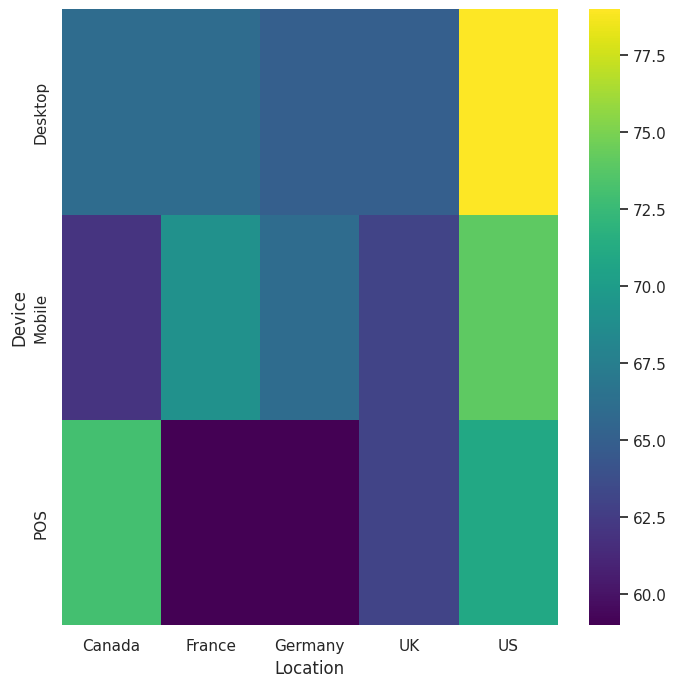

In [195]:
# @title Location vs Device
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Device'].value_counts()
    for x_label, grp in df.groupby('Location')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Location')
_ = plt.ylabel('Device')

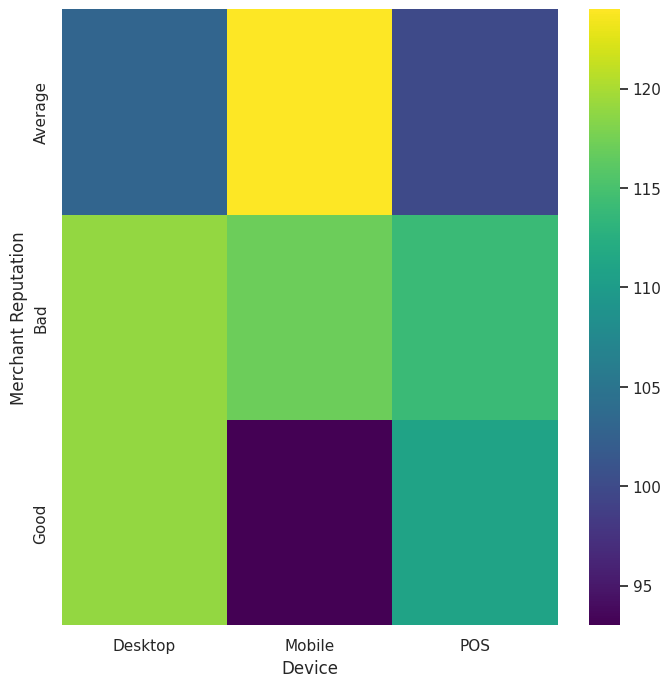

In [132]:
# @title Device vs Merchant Reputation

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Merchant Reputation'].value_counts()
    for x_label, grp in df.groupby('Device')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Device')
_ = plt.ylabel('Merchant Reputation')

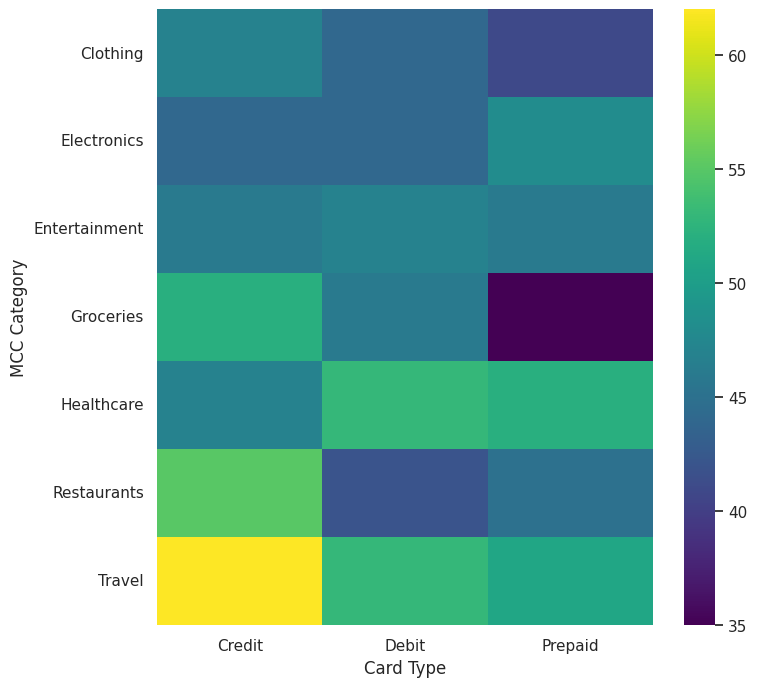

In [133]:
# @title Card Type vs MCC Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MCC Category'].value_counts()
    for x_label, grp in df.groupby('Card Type')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Card Type')
_ = plt.ylabel('MCC Category')

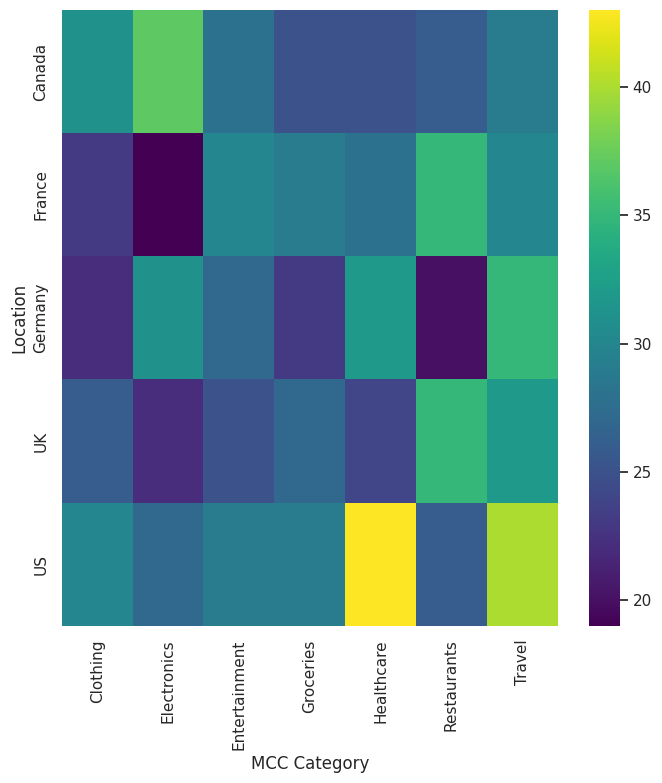

In [134]:
# @title MCC Category vs Location

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Location'].value_counts()
    for x_label, grp in df.groupby('MCC Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MCC Category')
_ = plt.ylabel('Location')

<ipython-input-135-9f36d7401d60>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Amount', y='Location', inner='box', palette='Dark2')


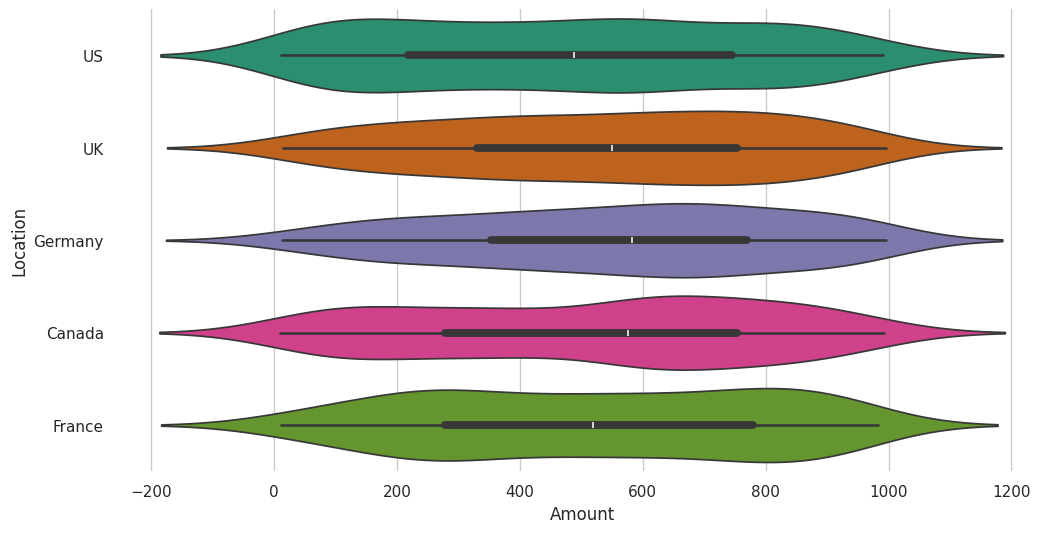

In [135]:
# @title Location vs Amount
"""
A violin plot is a hybrid of a box plot and a kernel density plot, which shows
peaks in the data. It is used to visualize the distribution of numerical data.
Unlike a box plot that can only show summary statistics, violin plots depict
summary statistics and the density of each variable.
"""
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Location'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Amount', y='Location', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-136-99aa457e1b92>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Amount', y='Device', inner='box', palette='Dark2')


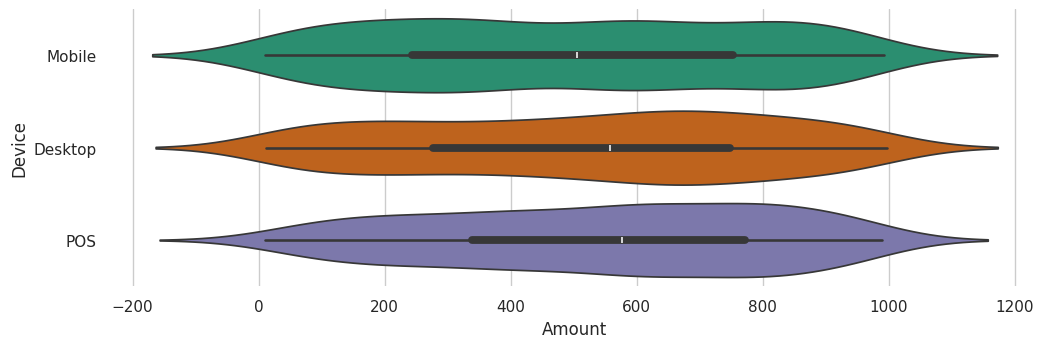

In [136]:
# @title Device vs Amount
"""
A violin plot is a hybrid of a box plot and a kernel density plot, which shows
peaks in the data. It is used to visualize the distribution of numerical data.
Unlike a box plot that can only show summary statistics, violin plots depict
summary statistics and the density of each variable.
"""
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Device'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Amount', y='Device', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

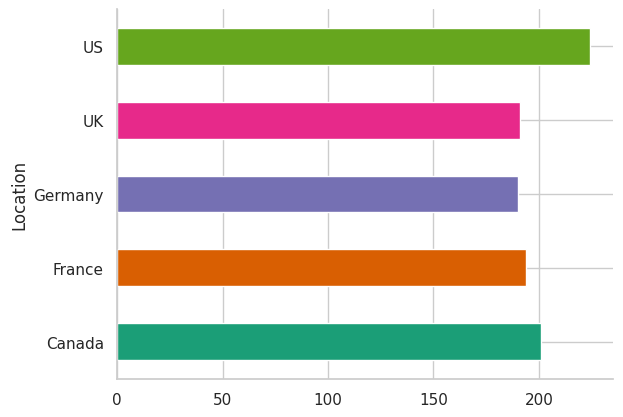

In [137]:
# @title Location

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Location').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

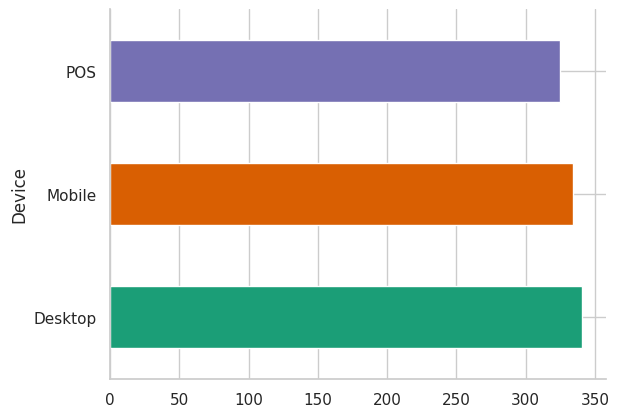

In [138]:
# @title Device

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Device').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

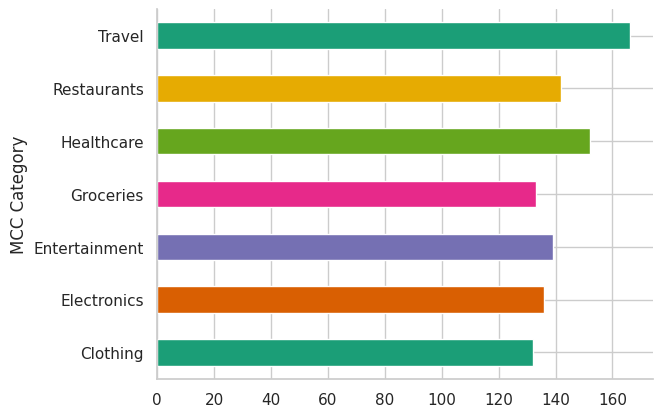

In [139]:
# @title MCC Category

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MCC Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

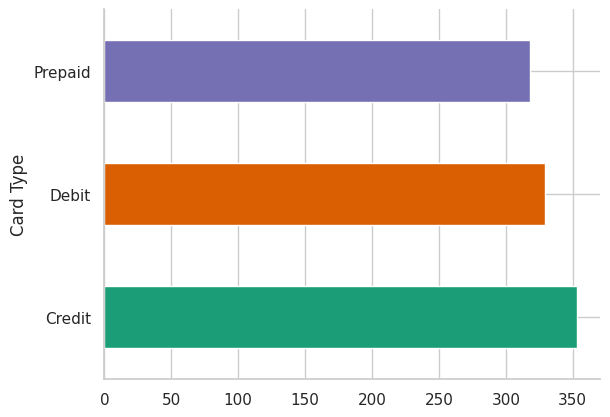

In [140]:
# @title Card Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

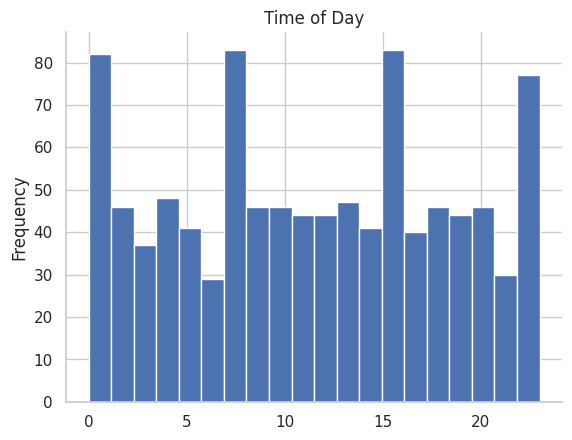

In [141]:
# @title Time of Day

from matplotlib import pyplot as plt
df['Time of Day'].plot(kind='hist', bins=20, title='Time of Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

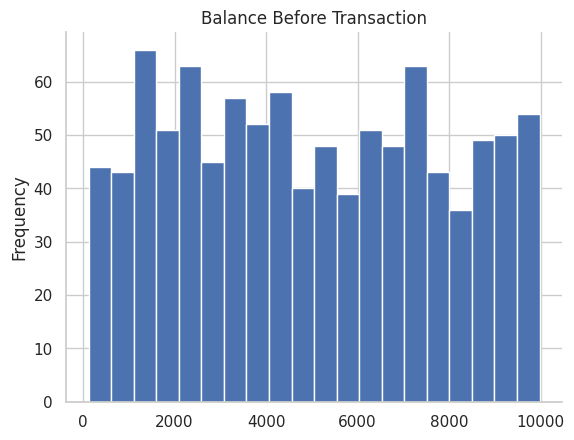

In [142]:
# @title Balance Before Transaction

from matplotlib import pyplot as plt
df['Balance Before Transaction'].plot(kind='hist', bins=20, title='Balance Before Transaction')
plt.gca().spines[['top', 'right',]].set_visible(False)

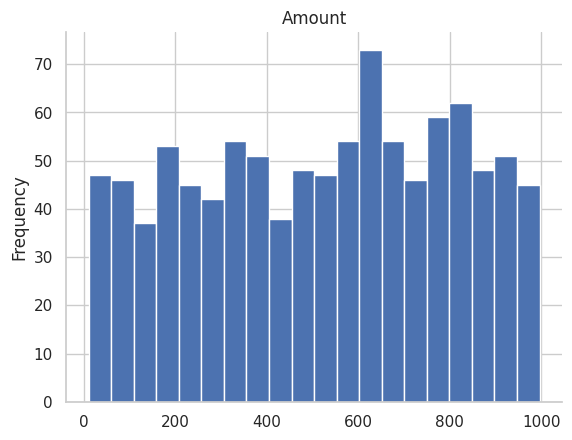

In [143]:
# @title Amount

from matplotlib import pyplot as plt
df['Amount'].plot(kind='hist', bins=20, title='Amount')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 4. Correlational Analysis

In [210]:
# @title Features Creation
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.day_name()
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df = df.drop(['Date', 'Time of Day', 'Merchant Location History'], axis=1)

Features created using "Date" and "Time of Day" fields:
*   Day of week - Nominal
*   Month of Year - Nominal
*   Year is ommitted as feature as all data is for year 2023 only

when most transactions are made

In [211]:
# @title Indentifying Feature Types
def get_column_types(dframe: pd.DataFrame):
  all_features = dframe.columns
  op_features = ["Is Fraudulent"]
  numeric_features = list(set(dframe._get_numeric_data().columns) - set(op_features) - set(["Time of Day", "DayOfWeek", "Month", "Merchant Location History"]))
  nominal_and_ordinal_features = list(set(all_features) - set(numeric_features) - set(op_features))
  ordinal_only_features = list(["Merchant Reputation", 'Online Transactions Frequency'])
  nominal_only_features = list(set(nominal_and_ordinal_features) - set(ordinal_only_features))

  return {
      "numeric_features": numeric_features,
      "nominal_only_features": nominal_only_features,
      "ordinal_only_features": ordinal_only_features,
      "nominal_and_ordinal_features": nominal_and_ordinal_features,
      "output_features": op_features
  }

col_types = get_column_types(df)
numeric_features = col_types["numeric_features"]
nominal_features = col_types["nominal_only_features"]
ordinal_features = col_types["ordinal_only_features"]

In [217]:
# @title Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features (X) from target variable (y)
X = df.drop("Is Fraudulent", axis=1)
y = df["Is Fraudulent"]

# Training to testing split - 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=71)

# Preprocessing non-numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), col_types["numeric_features"]),
        ("nominal", OneHotEncoder(), col_types["nominal_only_features"]),
        ("ordinal", OrdinalEncoder(), col_types["ordinal_only_features"])
    ])

logreg = LogisticRegression()
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", logreg)])
pipeline.fit(X_train, y_train)

# Predict with test data
y_pred = pipeline.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))
print("\n\n")

Classification Report:
              precision    recall  f1-score   support

          No       0.97      1.00      0.98       194
         Yes       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200

Confusion Matrix:
[[194   0]
 [  6   0]]
Accuracy Score:
0.97





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Normalization is not necessary before computing correlation coefficients between variables. Correlation measures the linear relationship between two variables, and it is not affected by the scale of the variables. Therefore, you can calculate correlation coefficients on raw data without normalizing it.

### Data visualizations with insights

In [ ]:
# df.boxplot(figsize=(10, 10), rot=90, grid = False, medianprops={'linewidth': 2, 'color': 'purple'})

### Correlation analysis and visualisation

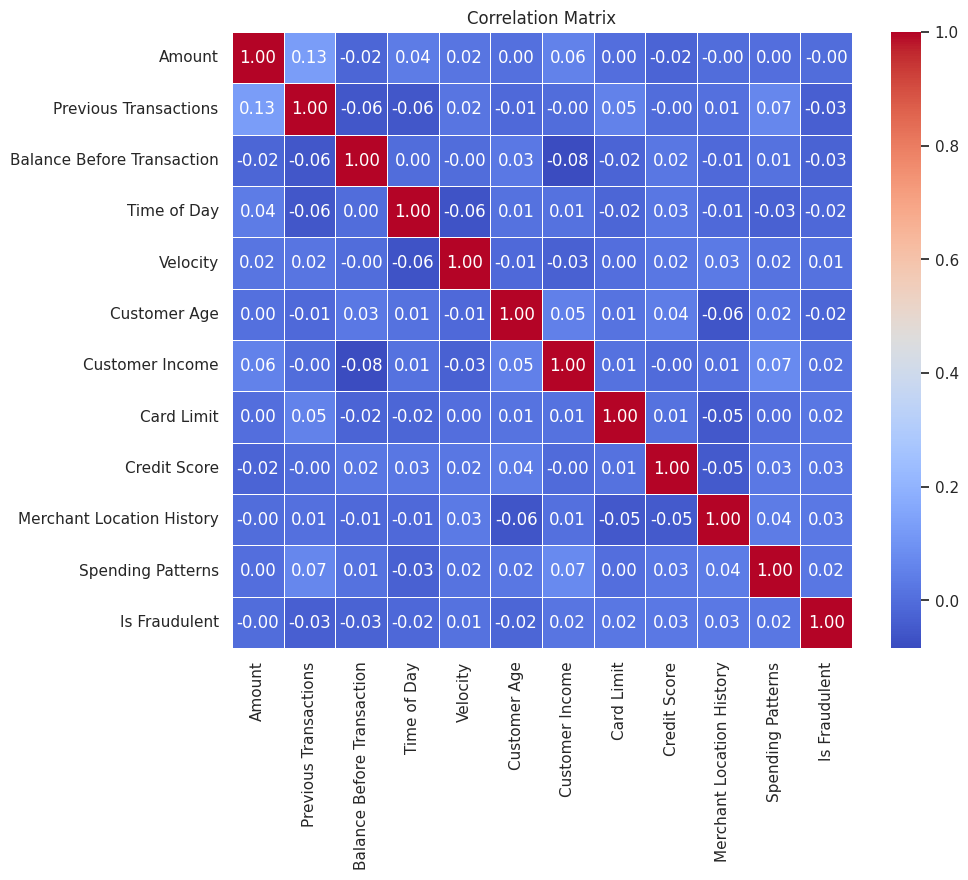

In [223]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- 𝑟 > 0 indicates positive correlation.
- 𝑟 < 0 indicates negative correlation.
- r = 1 is the maximum possible value of 𝑟, showing perfect positive linear relationship between 2 variables
- Data fields on diagonal always have r = 1 as a data field always has a perfect linear relationship to itself.
- r = −1 is the minimum possible value of 𝑟, showing perfect negative linear relationship between variables.
- When r ≈ 0, means weak correlation between variables.

**High Positive Correlations:**
- "Amount" and "Previous Transactions": 0.13
- "Customer Income" and "Spending Patterns": 0.073
- "Previous Transactions" and "Spending Patterns": 0.066
- "Time of Day" and "Spending Patterns": 0.032
- "Time of Day" and "Credit Score": 0.026

**High Negative Correlations:**
- "Merchant Location History" and "Card Limit": -0.050
- "Credit Score" and "Merchant Location History": -0.050
- "Velocity" and "Time of Day": -0.063
- "Customer Income" and "Balance Before Transaction": -0.084

### Correlational analysis effect on feature selection

In [ ]:
"""
Explaination of correlation on feature selection
"""

## Data Pre-processing and cleaning
<ol>
<li>Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.</li>
<li>Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification. Techniques used without justification will not be awarded marks. Explore a few techniques for identifying feature importance for your feature engineering task.</li>

## Model Building
<ol type = "a">
<li>Split the dataset into training and test sets</li>
<ol type = "i">
<li>Recommended: Train = 80 % Test = 20%</li>
<li>Other 1: Train = 50 % Test = 50%</li>
<li>Other 2: Train = 60 % Test = 40%</li>
<li>Other 3: Train = 70 % Test = 30%</li>
<li>Other 4: Train = 90 % Test = 10%</li>
</ol>
<li>Build model using Logistic model and Decision Tree</li>
<ol type = "i">
<li>Tune hyperparameters (e.g., number of trees, maximum depth) using cross-
validation. Justify your answer.</li>
</ol>

### Dataset split: Training and Test Sets

#### 50/50

#### 60/40

#### 70/30

#### 80/20

#### 90/10

### Model building and hyperparameter tuning

#### Logistic model

#### Decision Tree

In [173]:
# @title Decision Tree

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=71)

# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", decision_tree)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Decision tree evaluation
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Decision Tree Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

          No       0.94      0.93      0.93       186
         Yes       0.13      0.14      0.14        14

    accuracy                           0.88       200
   macro avg       0.53      0.54      0.54       200
weighted avg       0.88      0.88      0.88       200

Decision Tree Confusion Matrix:
[[173  13]
 [ 12   2]]
Decision Tree Accuracy Score:
0.875


## Performance Evaluation
<ol type = "a">
<li>Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.</li>
<li>Provide insights into which model performs better and why</li>
</ol>


## Data
<table width="100%" align="right">
  <tr>
    <th></th>
    <th>Accuracy</th>
    <th>Precision (Yes)</th>
    <th>Recall (Yes)</th>
    <th>F1-Score (Yes)</th>
  </tr>
  <tr>
    <th>Decision Tree</th>
    <td>0.875</td>
    <td>0.13</td>
    <td>0.14</td>
    <td>0.14</td>
  </tr>
  <tr>
    <th>Logistic Regression</th>
    <td>0.93</td>
    <td>0.00</td>
    <td>0.00</td>
    <td>0.00</td>
  </tr>
</table>

## Comparison
**Accuracy:** The Logistic Regression model has a higher accuracy (93%) compared to the Decision Tree model (87.5%). However, accuracy may not be the sole metric to consider, especially in imbalanced datasets.

**Precision (Yes):** Both models have very low precision for the "Yes" class. This means that when they predict a transaction as fraudulent, it is rarely correct. Precision is an important metric when the cost of false positives is high.

**Recall (Yes):** Both models have low recall for the "Yes" class. This indicates that they miss a significant portion of actual fraudulent transactions. Recall is important when the cost of false negatives (missing a fraudulent transaction) is high.

**F1-Score (Yes):** The F1-Score combines precision and recall, providing a balance between the two. Both models have low F1-Scores for the "Yes" class.

## Conclusion
While Logistic Regression has a higher overall accuracy, it performs poorly on identifying fraudulent transactions ("Yes" class), with precision, recall, and F1-Score all being very low.
The Decision Tree model has a lower accuracy but may provide a more balanced performance in terms of precision and recall for the "Yes" class.

# Assignment Part 2

## Model Building
Build ML models using K-Nearest Neighbors (K-NN), Support Vector Machine (SVM),
Naive Bayesian, Random Forest, and Adaboost

### K-Nearest Neighbors

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Split the dataset into features and target variable
# Create the K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", knn_model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred))
print("K-Nearest Neighbors Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("K-Nearest Neighbors Accuracy Score:")
print(accuracy_score(y_test, y_pred))

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

          No       0.93      1.00      0.96       186
         Yes       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200

K-Nearest Neighbors Confusion Matrix:
[[186   0]
 [ 14   0]]
K-Nearest Neighbors Accuracy Score:
0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### SVM

In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the Support Vector Machine model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.) based on your data

# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", svm_model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, y_pred))
print("Support Vector Machine Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Support Vector Machine Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

          No       0.93      1.00      0.96       186
         Yes       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200

Support Vector Machine Confusion Matrix:
[[186   0]
 [ 14   0]]
Support Vector Machine Accuracy Score:
0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# GaussianNB is used for continuous features
# while MultinomialNB is for discrete features
nb_model = GaussianNB()

# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", nb_model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluating the model
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))
print("Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Naive Bayes Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.88      0.90       186
         Yes       0.00      0.00      0.00        14

    accuracy                           0.82       200
   macro avg       0.46      0.44      0.45       200
weighted avg       0.86      0.82      0.84       200

Naive Bayes Confusion Matrix:
[[164  22]
 [ 14   0]]
Naive Bayes Accuracy Score:
0.82


In [202]:
# @title Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=71)  # You can adjust hyperparameters as needed

# Create the pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", rf_model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Random Forest Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

          No       0.93      1.00      0.96       186
         Yes       0.00      0.00      0.00        14

    accuracy                           0.93       200
   macro avg       0.47      0.50      0.48       200
weighted avg       0.86      0.93      0.90       200

Random Forest Confusion Matrix:
[[186   0]
 [ 14   0]]
Random Forest Accuracy Score:
0.93


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
# @title Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=50, random_state=71)  # You can adjust hyperparameters as needed

pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", ada_model)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("AdaBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("AdaBoost Accuracy Score:")
print(accuracy_score(y_test, y_pred))

AdaBoost Classification Report:
              precision    recall  f1-score   support

          No       0.93      0.98      0.96       186
         Yes       0.20      0.07      0.11        14

    accuracy                           0.92       200
   macro avg       0.57      0.52      0.53       200
weighted avg       0.88      0.92      0.90       200

AdaBoost Confusion Matrix:
[[182   4]
 [ 13   1]]
AdaBoost Accuracy Score:
0.915


## Performance Evaluation
Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics. Comment on the performance of these models.

## Fine-Tuning Hyperparameters
You are required to explore the hyperparameter space for each classifier, utilizing techniques such as grid search or randomized search, to find the optimal combination of parameters that maximizes performance metrics.

## Performance Evaluation
After hyperparameter fine-tuning, evaluate the performance of each classifier using the following evaluation measures: Precision, Recall, F-score, Accuracy, Misclassification Rate

## Comparison and Analysis
Compare the performance of each classifier using the evaluation measures and provide a detailed analysis of the results. Recommend the ML model that, in your opinion, demonstrates the most favorable performance and justify your choice.

In [219]:
%unload_ext google.colab.data_table

# References
- [Categorical features correlation](https://stackoverflow.com/questions/46498455/categorical-features-correlation)
- [Better Google Colab Experience](https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82)
- [Pandas and Seaborn](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly)
- [Data visualizations with Seaborn](https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/3_data_visualization/2_data_visualization_with_seaborn.ipynb#scrollTo=h2RRRwM4a8JF)
- [Multivariate plots](https://seaborn.pydata.org/tutorial/relational.html)
- [Principal Component Analysis](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/)
- [k-fold Cross Validation](https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/)
- [Fraud detection on Kaggle](https://www.kaggle.com/datasets/iabhishekbhardwaj/fraud-detection)
- [Fraud detection with GNN](https://www.kaggle.com/code/jawherjabri/fraud-detection-with-gnn)
- [Transaction Data for fraud analysis](https://www.kaggle.com/datasets/isabbaggin/transaction-fraudulent-financial-syntheticdata)
- [Feature Engineering Methodologies w/ Debit and Credit Txns](https://tspace.library.utoronto.ca/bitstream/1807/98287/1/Pyda_Susanne_201911_MAS_thesis.pdf)
- [Artificial Intelligence](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/resources/lecture-1-introduction-and-scope/)
- [ACI Questions](https://ocw.mit.edu/courses/6-034-artificial-intelligence-fall-2010/pages/exams/)
- [MFML](https://math.libretexts.org/Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/01%3A_Linear_Equations/1.04%3A_Applications/1.4.01%3A_Applications_(Exercises))
- [Intro to Linear Algebra](https://web.math.ucsb.edu/~padraic/ucsb_2013_14/math108a_f2013/math108a_f2013.html)
- [Linear Algebra Notes](https://web.math.ucsb.edu/~padraic/notes.html)
- [Advanced Linear Algebra](https://web.math.ucsb.edu/~padraic/ucsb_2013_14/math108b_w2014/math108b_w2014.html)
- [Development in Containers](https://code.visualstudio.com/docs/devcontainers/containers#_create-a-devcontainerjson-file)